## A Data Science Journey of Wine
Hvae you ever wonder how a wine taste like? Have you evry got lost in the wide variety of wine to choose from? With data science. Let's walk through the "taste" of wine with data science methods. Come find your wine of choice without even one sip!

In this notebook. I will do some exploratory analysis on the wine dataset extracted from the website https://www.winemag.com in November. 2017.

First of all, let's import the necessary libraies that are likely to be used in the project.

In [158]:
# import libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import os
import nltk
import string
import seaborn as sns
import random
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter

In [159]:
#Check what is in the directory
#print(os.listdir())

In [160]:
Wine_Review = pd.read_csv('./wine-reviews/winemag-data_first150k.csv', sep =',')

The dataset contains more than 150 thousand rows of wine review data, including columns like **countries of origins**, **descriptions** of the wine, **designation**, review **points**, **price**, **province** and so on.

In [161]:
Wine_Review.dropna()
print(Wine_Review.shape)

(150930, 11)


In [162]:
print(Wine_Review.head())

   Unnamed: 0 country                                        description  \
0           0      US  This tremendous 100% varietal wine hails from ...   
1           1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2           2      US  Mac Watson honors the memory of a wine once ma...   
3           3      US  This spent 20 months in 30% new French oak, an...   
4           4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   

            region_1           region_2             variety  \
0        Napa Valley               

## Descriptive statistics: Wine Items by Country

In [163]:
#Top countries of origins
Countries_Description = Wine_Review[['description','country']].groupby('country').count().reset_index()
Countries_Description = Countries_Description.sort_values(by=['description'], ascending = False)
Countries_Description.columns = [['country', 'number']]
print(Countries_Description[:10])

        country number
44           US  62397
22        Italy  23478
15       France  21098
40        Spain   8268
8         Chile   5816
1     Argentina   5631
33     Portugal   5322
2     Australia   4957
32  New Zealand   3320
3       Austria   3057


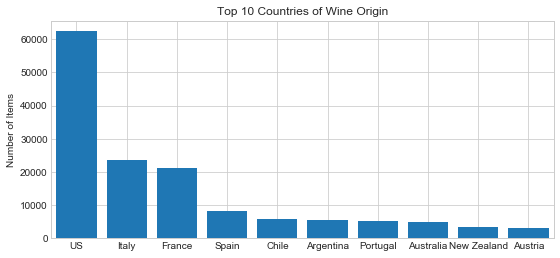

In [164]:
#draw a histogram for the top 10 countries of origins


top_10_countries_of_origins = Countries_Description[:10]

Countries = top_10_countries_of_origins.iloc[:,0].tolist()


y_pos = np.arange(len(Countries))

No_wines = top_10_countries_of_origins.iloc[:,1].tolist()
plt.figure(figsize=(9, 4))

plt.xlim([-0.5, 9.5])
plt.bar(y_pos, No_wines, align='center', alpha=1)


plt.xticks(y_pos, Countries)
plt.ylabel('Number of Items')
plt.title('Top 10 Countries of Wine Origin')
 
plt.show()


In [165]:
#Top countries of origins with the highest price
Countries_Price = Wine_Review[['country','price']].groupby('country').mean().reset_index()
Countries_Price = Countries_Price.sort_values(by=['price'], ascending = False)
print(Countries_Price[:10])

       country      price
45   US-France  50.000000
14     England  47.500000
15      France  45.619885
19     Hungary  44.204348
26  Luxembourg  40.666667
17     Germany  39.011078
22       Italy  37.547913
7       Canada  34.628866
44          US  33.653808
21      Israel  31.304918


In [166]:
#Top countries of origins with the highest price deviation
Countries_Price_deviation = Wine_Review[['country','price']].groupby('country').std().reset_index()
Countries_Price_deviation = Countries_Price_deviation.sort_values(by=['price'], ascending = False)
print(Countries_Price_deviation[:10])

      country      price
15     France  69.697060
19    Hungary  66.264502
17    Germany  56.857128
2   Australia  39.008512
22      Italy  37.067869
33   Portugal  35.242873
40      Spain  33.861666
34    Romania  28.845571
3     Austria  28.540861
44         US  24.891343


Text(0.5,1,'Price Level Of Wine By Country')

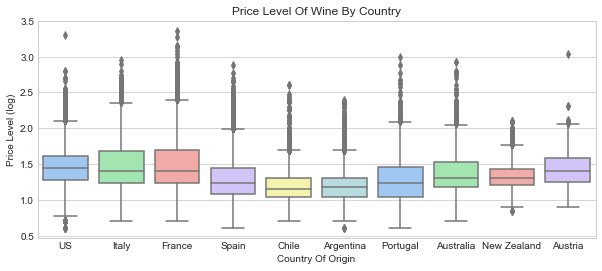

In [167]:
# Draw a boxplot of Country of Wine Origin and Price.




Wine_Review_top_10 = Wine_Review.loc[(Wine_Review['country'] == 'US') | (Wine_Review['country'] == 'Italy')|
                                     (Wine_Review['country'] == 'France') | (Wine_Review['country'] == 'Spain')|
                                     (Wine_Review['country'] == 'Chile') | (Wine_Review['country'] == 'Portugal')|
                                     (Wine_Review['country'] == 'Argentina') | (Wine_Review['country'] == 'Australia')|
                                     (Wine_Review['country'] == 'Austria') | (Wine_Review['country'] == 'New Zealand')]   

Wine_Review_top_10 = Wine_Review_top_10[['country', 'price']]
Wine_Review_top_10.columns = ['Country Of Origin', 'Price']

# The price deviates a lot from the median, so I used log10 to normalize it.
Wine_Review_top_10['Price Level (log)'] = np.log10(Wine_Review_top_10['Price'])



sns.set_style("whitegrid")



fig, ax = plt.subplots(figsize=(10,4))
boxplot = sns.boxplot(x='Country Of Origin', y='Price Level (log)', data = Wine_Review_top_10, palette="pastel", order=["US", "Italy", "France", "Spain", "Chile", "Argentina", "Portugal",  "Australia", "New Zealand", "Austria"])
boxplot.set_title('Price Level Of Wine By Country')

## Vive la France!
After exploratory analysis of wine in the world. We come to the old world, France, and check some characteristic of French wine.

In [168]:
#Filter French wine from the data set.
French_Wine_Review = Wine_Review.loc[Wine_Review['country'] == "France"]
print(French_Wine_Review.shape)
#List unique values in the df['name'] column


(21098, 11)


In [169]:
#province as origins
French_Wine_Province = French_Wine_Review[['province','description']].groupby('province').count().reset_index()
French_Wine_Province = French_Wine_Province.sort_values(by=['description'], ascending = False)
print(French_Wine_Province)

                province  description
2               Bordeaux         6111
3               Burgundy         4308
7           Loire Valley         1786
0                 Alsace         1680
10      Southwest France         1601
4              Champagne         1370
9           Rhône Valley         1318
6   Languedoc-Roussillon         1082
8               Provence         1021
1             Beaujolais          532
5           France Other          289


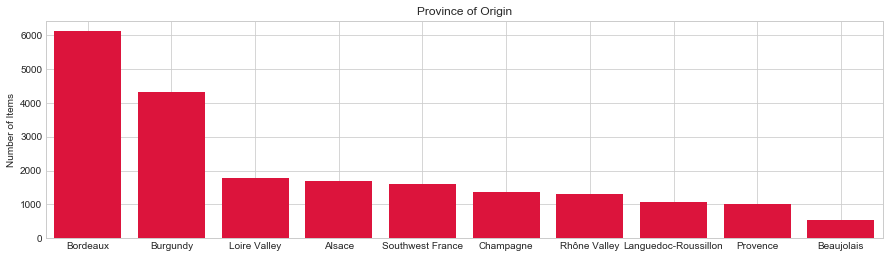

In [170]:
#draw a histogram for the 10 province of origins


Province_Of_Origins = French_Wine_Province[:10]

Provinces = Province_Of_Origins.iloc[:,0].tolist()


y_pos = np.arange(len(Provinces))

No_wines = Province_Of_Origins.iloc[:,1].tolist()
plt.figure(figsize=(15, 4))

plt.xlim([-0.5, 9.5])
plt.bar(y_pos, No_wines, align='center', color = 'crimson', alpha=1)


plt.xticks(y_pos, Provinces)
plt.ylabel('Number of Items')
plt.title('Province of Origin')
 
plt.show()



In [171]:
#French province of origins with the highest price
French_Province_Price = French_Wine_Review[['province','price']].groupby('province').mean().reset_index()
French_Province_Price = French_Province_Price.sort_values(by=['price'], ascending = False)
print(French_Province_Price[:10])

                province      price
4              Champagne  93.412305
3               Burgundy  70.602633
9           Rhône Valley  49.832656
2               Bordeaux  42.601956
0                 Alsace  31.876380
7           Loire Valley  27.071891
8               Provence  23.442029
10      Southwest France  22.879363
6   Languedoc-Roussillon  22.015640
1             Beaujolais  17.267327


In [172]:
#French province of origins with the highest price deviation
French_Province_Price_deviation = French_Wine_Review[['province','price']].groupby('province').std().reset_index()
French_Province_Price_deviation = French_Province_Price_deviation.sort_values(by=['price'], ascending = False)
print(French_Province_Price_deviation[:10])

                province       price
4              Champagne  102.510714
2               Bordeaux   96.293838
3               Burgundy   78.317744
9           Rhône Valley   61.401223
6   Languedoc-Roussillon   33.541045
0                 Alsace   22.149001
10      Southwest France   20.836563
7           Loire Valley   20.538205
8               Provence   13.140126
5           France Other    9.235507


Text(0.5,1,'Price Level Of Wine by Province')

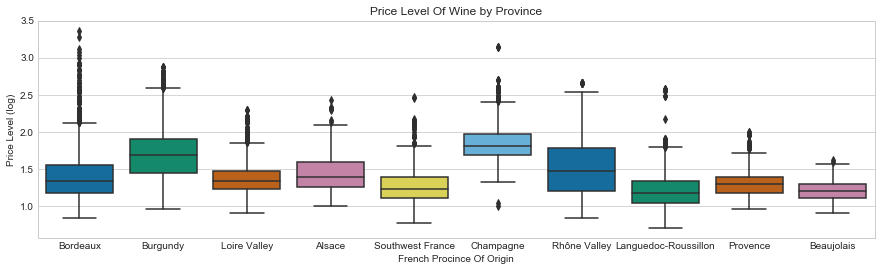

In [173]:
# Draw a boxplot of Province of Wine Origin and Price.


French_Wine_Province = French_Wine_Review.loc[(French_Wine_Review['province'] == 'Bordeaux') | (French_Wine_Review['province'] == 'Burgundy')|
                                     (French_Wine_Review['province'] == 'Loire Valley') | (French_Wine_Review['province'] == 'Alsace')|
                                     (French_Wine_Review['province'] == 'Southwest France') | (French_Wine_Review['province'] == 'Champagne')|
                                     (French_Wine_Review['province'] == 'Rhône Valley') | (French_Wine_Review['province'] == 'Languedoc-Roussillon')|
                                     (French_Wine_Review['province'] == 'Provence') | (French_Wine_Review['province'] == 'Beaujolais')]   

French_Wine_Province = French_Wine_Province[['province', 'price']]
French_Wine_Province.columns = ['French Procince Of Origin', 'Price']

#to overcome the issue of large price dispersion, I used the log of the price instead of the price itself.
French_Wine_Province['Price Level (log)'] = np.log10(French_Wine_Province['Price'])



sns.set_style("whitegrid")



fig, ax = plt.subplots(figsize=(15,4))
boxplot = sns.boxplot(x='French Procince Of Origin', y='Price Level (log)', data = French_Wine_Province, palette="colorblind", order=["Bordeaux", "Burgundy", "Loire Valley", "Alsace", "Southwest France", "Champagne", "Rhône Valley", "Languedoc-Roussillon", "Provence", "Beaujolais"])
boxplot.set_title('Price Level Of Wine by Province')

## French Wine Wordcloud

In [174]:
#download nltk punkt package to tokenize English reviews with puctuation removed
nltk.download("punkt")


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/halfmoonliu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [175]:
#download nltk stopwords package
nltk.download("stopwords")



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/halfmoonliu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [176]:
useless_words = nltk.corpus.stopwords.words("english") + list(string.punctuation)

In [177]:
French_Wine_Review_only = French_Wine_Review.loc[French_Wine_Review['country'] == "France"][['description']]
print(type(French_Wine_Review_only))

<class 'pandas.core.frame.DataFrame'>


In [178]:
All_French_Review_words = list()

for i in range(len(French_Wine_Review_only)):
    word_list = nltk.word_tokenize(French_Wine_Review_only.iloc[i]['description'])
    for j in range(len(word_list)):
        lower_word = word_list[j].lower()
        if lower_word not in useless_words:
            All_French_Review_words.append(lower_word)
        

print(len(All_French_Review_words))



460555


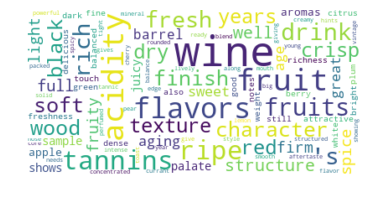

In [179]:


# Create and generate a word cloud image:
word_could_dict=Counter(All_French_Review_words)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(word_could_dict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")#turn off grids

plt.show()
wordcloud.to_file("French_Wine_Review.png")

In [180]:
#Below is an example for a single wine description

Review_Example = French_Wine_Review['description'].iloc[[0,1]]


In [181]:
Review_Example = "".join(Review_Example)

In [182]:
print(Review_Example)

This is the top wine from La Bégude, named after the highest point in the vineyard at 1200 feet. It has structure, density and considerable acidity that is still calming down. With 18 months in wood, the wine has developing an extra richness and concentration. Produced by the Tari family, formerly of Château Giscours in Margaux, it is a wine made for aging. Drink from 2020.This wine is in peak condition. The tannins and the secondary flavors dominate this ripe leather-textured wine. The fruit is all there as well: dried berries and hints of black-plum skins. It is a major wine right at the point of drinking with both the mature flavors and the fruit in the right balance.


In [183]:
#The tokenized word list of the discription
Review_Example = nltk.word_tokenize(Review_Example)
print(Review_Example)

['This', 'is', 'the', 'top', 'wine', 'from', 'La', 'Bégude', ',', 'named', 'after', 'the', 'highest', 'point', 'in', 'the', 'vineyard', 'at', '1200', 'feet', '.', 'It', 'has', 'structure', ',', 'density', 'and', 'considerable', 'acidity', 'that', 'is', 'still', 'calming', 'down', '.', 'With', '18', 'months', 'in', 'wood', ',', 'the', 'wine', 'has', 'developing', 'an', 'extra', 'richness', 'and', 'concentration', '.', 'Produced', 'by', 'the', 'Tari', 'family', ',', 'formerly', 'of', 'Château', 'Giscours', 'in', 'Margaux', ',', 'it', 'is', 'a', 'wine', 'made', 'for', 'aging', '.', 'Drink', 'from', '2020.This', 'wine', 'is', 'in', 'peak', 'condition', '.', 'The', 'tannins', 'and', 'the', 'secondary', 'flavors', 'dominate', 'this', 'ripe', 'leather-textured', 'wine', '.', 'The', 'fruit', 'is', 'all', 'there', 'as', 'well', ':', 'dried', 'berries', 'and', 'hints', 'of', 'black-plum', 'skins', '.', 'It', 'is', 'a', 'major', 'wine', 'right', 'at', 'the', 'point', 'of', 'drinking', 'with', 'bo

## The Aroma Wheel Paradigm
To filter out words irrelavant to the taste, or aroma of wine, I used a modified version (https://winefolly.com/) of the aroma wheel (Noble et al., 1987) to analyze the "taste" of French wine.

In [184]:
#Create a list of words describing the aroma of wine.

Aroma_Wheel = [
#flower 
'iris', 'peony', 'elderflower', 'acacia', 'lilac', 'jasmine', 'honeysuckle', 'violet', 'lavender', 'rose', 
'potpourri', 'hibiscus', 
#citrus 
'lime', 'lemon', 'grapefruit', 'orange', 'marmalade', 
#tree fruit
'quince', 'apple', 'pear', 'nectarine', 'peach', 'apricot', 'persimmon',
#tropical fruit    
'pineapple','mango', 'guava', 'passion fruit', 'lychee', 'bubblegum', 
#Red Fruit    
'cranberry', 'red plum', 'pomegranate', 'sour cherry', 'strawberry', 'cherry', 'raspberry', 
#Black Fruit
'boysenberry', 'black currant', 'black cherry', 'plum', 'blackberry', 'blueberry', 'olive'
#Dried Fruit
'raisin', 'fig', 'date', 'fruitcake', 
#noble rot
'beeswax', 'ginger', 'honey', 
#Spice
'white pepper', 'red pepper', 'black pepper', 'cinnamon', 'anise'
#5-Spice
'fennel', 'eucalyptus', 'mint', 'thyme', 
#Vegetable
'grass', 'tomato leaf', 'gooseberry', 'bell pepper', 'jalapeño', 'bitter almond','tomato', 'sun-dried tomato', 
'black tea', 
#earth
'clay pot', 'slate', 'wet gravel', 'potting soil', 'red beet', 'volcanic rocks', 'petroleum'
#Secondary Aromas
#microbial
'butter', 'cream', 'sourdough', 'lager', 'truffle', 'mushroom', 
#Tertiary Aromas
'oak aging', 'vanilla', 'coconut', 'baking spices', 'cigar box', 'smoke', 'dill', 
#General Aging
'dried fruit', 'nutty flavors', 'tobacco', 'coffee', 'cocoa', 'leather', 
#Faults & Other
#cork taint
'musty cardboard', 'wet Dog'
#Sulfides & Mercaptans
'cured meat', 'boiled eggs', 'burnt rubber', 'lit match', 'garlic', 'onion', 'cat pee',
#brettanomyces
'black cardamon','band-aid', 'sweaty leather saddle', 'horse manure', 
#madeirized
'toffee', 'stewed fruit', 
#volatile acidity
'vinegar'
]

## The Bordeau Taste
First, let's use the most common wine in the data set, Bordeau, and see the words used in the description.

In [185]:
#Select description of wine coming from Bordeaux.
Bordeaux_Review = French_Wine_Review.loc[French_Wine_Review['province'] == "Bordeaux"][['description']]
print(Bordeaux_Review.shape)

(6111, 1)


In [186]:
#Create a list of lowercase words describing Bordeaux wine

All_Bordeaux_words = list()

for i in range(len(Bordeaux_Review)):
    word_list = nltk.word_tokenize(Bordeaux_Review.iloc[i]['description'])
    for j in range(len(word_list)):
        lower_word = word_list[j].lower()
        All_Bordeaux_words.append(lower_word)
        

print(len(All_Bordeaux_words))
    

242448


In [187]:
#Filter out stopwords and punctuation.
filtered_Bordeaux_words = [word for word in All_Bordeaux_words if not word in useless_words]
print(len((filtered_Bordeaux_words)))

123336


In [188]:
from collections import Counter

Bordeaux_word_counter = Counter(filtered_Bordeaux_words)

In [189]:
#Count the most common words describing Bordeaux.
Bordeaux_most_common_words = Bordeaux_word_counter.most_common()[:20]
print(Bordeaux_most_common_words)

[('wine', 6611), ('tannins', 3235), ('fruit', 3047), ('acidity', 2248), ('ripe', 2177), ('barrel', 1976), ('sample', 1967), ('fruits', 1875), ('flavors', 1848), ('wood', 1641), ('black', 1580), ('rich', 1344), ('character', 1100), ('fresh', 1079), ('firm', 1068), ("'s", 1058), ('structure', 1041), ('dry', 1018), ('drink', 999), ('well', 961)]


In [190]:
#Filtering out the Aroma words in Bordeaux wine description.
Bordeaux_Aroma_Wheel_Words = [word for word in filtered_Bordeaux_words if word in Aroma_Wheel]
print(len(Bordeaux_Aroma_Wheel_Words))

2555


In [191]:
#Create a word counter for Aroma words describing Bordeaux wine.
Bordeaux_Aroma_Wheel_Counter = Counter(Bordeaux_Aroma_Wheel_Words)

In [192]:
Bordeaux_most_common_aroma = Bordeaux_Aroma_Wheel_Counter.most_common()[:20]
print(Bordeaux_most_common_aroma)

[('plum', 429), ('blackberry', 419), ('grapefruit', 127), ('pear', 121), ('lemon', 111), ('honey', 111), ('apple', 105), ('vanilla', 92), ('apricot', 87), ('orange', 84), ('mint', 84), ('peach', 82), ('coffee', 80), ('cherry', 64), ('tobacco', 49), ('ginger', 42), ('lime', 41), ('marmalade', 36), ('pineapple', 34), ('strawberry', 32)]


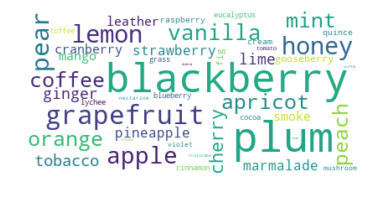

In [193]:
#Use Word Cloud to present the results. The larger the word, the more frequent it is in the corpus.



wordcloud_bordeaux_Aroma = WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(Bordeaux_Aroma_Wheel_Counter)


plt.figure()
plt.imshow(wordcloud_bordeaux_Aroma, interpolation="bilinear")

plt.axis("off")
plt.show()
wordcloud_bordeaux_Aroma.to_file("Bordeaux_Wine_Aroma.png")

## The Burgundy taste
Then, I applied the same methods to present the tsate of Burgundy wine.

In [194]:
#Select description of wine coming from Burgundy.
Burgundy_Review = French_Wine_Review.loc[French_Wine_Review['province'] == "Burgundy"][['description']]
print(Burgundy_Review.shape)

(4308, 1)


In [195]:
#Create a list of lowercase words describing Burgundy wine
All_Burgundy_words = list()

for i in range(len(Burgundy_Review)):
    word_list = nltk.word_tokenize(Burgundy_Review.iloc[i]['description'])
    for j in range(len(word_list)):
        lower_word = word_list[j].lower()
        All_Burgundy_words.append(lower_word)
        

print(len(All_Burgundy_words))
    

185593


In [196]:
#Filter out stopwords and punctuation.
filtered_Burgundy_words = [word for word in All_Burgundy_words if not word in useless_words]
print(len((filtered_Burgundy_words)))

93232


In [197]:
#Count the most common words describing Burgundy.
Burgundy_word_counter = Counter(filtered_Burgundy_words)
Burgundy_most_common_words = Burgundy_word_counter.most_common()[:20]
print(Burgundy_most_common_words)

[('wine', 4469), ('acidity', 2221), ('fruit', 1894), ('flavors', 1737), ('ripe', 1594), ('fruits', 1541), ('tannins', 1263), ('wood', 1066), ('rich', 1027), ('years', 951), ('drink', 930), ("'s", 872), ('structure', 870), ('fresh', 862), ('character', 815), ('soft', 815), ('red', 791), ('texture', 709), ('aging', 681), ('crisp', 622)]


In [198]:
#Filtering out the Aroma words in Burgundy wine description.
Burgundy_Aroma_Wheel_Words = [word for word in filtered_Burgundy_words if word in Aroma_Wheel]

In [199]:
#Create a word counter for Aroma words describing Burgundy wine.
Burgundy_Aroma_Wheel_Counter = Counter(Burgundy_Aroma_Wheel_Words)

In [200]:
Burgundy_most_common_aroma = Burgundy_Aroma_Wheel_Counter.most_common()[:20]
print(Burgundy_most_common_aroma)

[('apple', 397), ('plum', 367), ('pear', 295), ('peach', 201), ('vanilla', 192), ('cherry', 186), ('strawberry', 175), ('apricot', 156), ('lemon', 155), ('raspberry', 112), ('grapefruit', 110), ('lime', 110), ('pineapple', 100), ('honey', 77), ('orange', 56), ('quince', 34), ('mango', 30), ('cranberry', 30), ('cream', 27), ('blackberry', 24)]


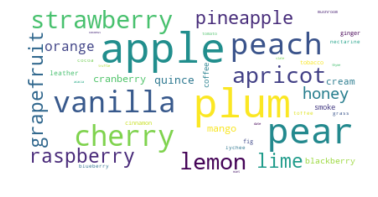

In [201]:
#Use Word Cloud to present the results. The larger the word, the more frequent it is in the corpus.



wordcloud_Burgundy_Aroma = WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(Burgundy_Aroma_Wheel_Counter)


plt.figure()
plt.imshow(wordcloud_Burgundy_Aroma, interpolation="bilinear")

plt.axis("off")
plt.show()
wordcloud_Burgundy_Aroma.to_file("Burgundy_Wine_Aroma.png")

## The Aroma-Distance Based Recommendation.
Here, I tried to use the persentage of aroma words used to describe the wine from a given province as parameters to determine the "distance of taste", or Aroma-Distance between provinces of origin.

In [202]:

French_Province = ['Champagne', 'Bordeaux', 'Burgundy', 'Rhône Valley', 'Languedoc-Roussillon', 'Alsace', 
                   'Southwest France', 'Loire Valley', 'Provence', 'Beaujolais']


In [203]:
# First, I created a dictionary of province-list pairs, with all the aroma words used in the dataset 
# to describe the wine coming from the province.

Province_Dictionary = {}
for province_index in range(len(French_Province)):
    df = French_Wine_Review.loc[French_Wine_Review['province'] == French_Province[province_index]][['description']]
    list_temp = list()

    for i in range(len(df)):
        token_list_list = nltk.word_tokenize(df.iloc[i]['description'])
        for j in range(len(token_list_list)):
            lower_word = token_list_list[j].lower()
            list_temp.append(lower_word)
    
    filtered_list_temp = [word for word in list_temp if not word in useless_words]
    Aroma_Wheel_list_temp = [word for word in filtered_list_temp if word in Aroma_Wheel]                            
    Province_Dictionary[French_Province[province_index]] = Aroma_Wheel_list_temp   



In [204]:
#print the first 10 aroma words in the list describing Champagne.
print(Province_Dictionary['Champagne'][:10])

['raspberry', 'orange', 'apple', 'apple', 'apple', 'peach', 'apple', 'apple', 'pear', 'honey']


In [205]:
#Create a dictionary for all provinces for aroma word counts 


Aroma_template = {} #Create a template dictionary for all aromas in the aroma wheel.
for aroma in Aroma_Wheel:
    Aroma_template[aroma] =0 

    
Province_Aroma_Count = {}

for province in French_Province:
    Aroma_Dic = Aroma_template.copy()

    #Count the times a given aroma appeared in all reviews wine originated from a province.
    for review_word_aroma in Province_Dictionary[province]: 
        Aroma_Dic[review_word_aroma] +=1
    


    Province_Aroma_Count[province] = Aroma_Dic


#Check the results with previous results using the counter method.
print(Province_Aroma_Count['Bordeaux']['plum'])


429


In [206]:
#Create the aroma score, percentage of aroma used to describe the wine.
#i.e. word count of an aroma / sum of all wordcounts in the aroma wheel for every province.
#Thus, the sum of all scores should be 1.0

Province_Aroma_Component = {}

for province in French_Province:
    Dic_Temp = {}
    for aroma in Aroma_Wheel:
        Dic_Temp[aroma] = Province_Aroma_Count[province][aroma] / len(Province_Dictionary[province])

    Province_Aroma_Component[province] = Dic_Temp


Champagne_total = 0
for aroma in Province_Aroma_Score['Champagne']:
    Champagne_total += Province_Aroma_Score['Champagne'][aroma]
print(Champagne_total)



1.0


## The Bordeau taste, Revisited

Let's have a look on the taste component of Bordeaux wine.

In [207]:


bordeaux_taste_component =  Province_Aroma_Component['Bordeaux']

bordeaux_taste_component = sorted(bordeaux_taste_component.items(), key=lambda kv: kv[1], reverse = True)
print(bordeaux_taste_component)

[('plum', 0.16790606653620352), ('blackberry', 0.1639921722113503), ('grapefruit', 0.04970645792563601), ('pear', 0.04735812133072407), ('lemon', 0.04344422700587084), ('honey', 0.04344422700587084), ('apple', 0.0410958904109589), ('vanilla', 0.03600782778864971), ('apricot', 0.03405088062622309), ('orange', 0.03287671232876712), ('mint', 0.03287671232876712), ('peach', 0.03209393346379648), ('coffee', 0.03131115459882583), ('cherry', 0.025048923679060666), ('tobacco', 0.019178082191780823), ('ginger', 0.01643835616438356), ('lime', 0.01604696673189824), ('marmalade', 0.014090019569471625), ('pineapple', 0.013307240704500978), ('cranberry', 0.012524461839530333), ('strawberry', 0.012524461839530333), ('smoke', 0.011741682974559686), ('mango', 0.011350293542074364), ('leather', 0.010958904109589041), ('gooseberry', 0.00821917808219178), ('fig', 0.0070450097847358124), ('raspberry', 0.0062622309197651665), ('cream', 0.0062622309197651665), ('quince', 0.005870841487279843), ('eucalyptus',

## The Burgundy Taste, revisited
What about Burgundy wine?

In [208]:


burgundy_taste_component =  Province_Aroma_Component['Burgundy']

burgundy_taste_component = sorted(burgundy_taste_component.items(), key=lambda kv: kv[1], reverse = True)
print(burgundy_taste_component)

[('apple', 0.1324216144096064), ('plum', 0.12241494329553035), ('pear', 0.09839893262174783), ('peach', 0.06704469646430954), ('vanilla', 0.06404269513008673), ('cherry', 0.06204136090727151), ('strawberry', 0.058372248165443626), ('apricot', 0.05203468979319546), ('lemon', 0.051701134089392926), ('raspberry', 0.037358238825883926), ('lime', 0.03669112741827885), ('grapefruit', 0.03669112741827885), ('pineapple', 0.0333555703802535), ('honey', 0.0256837891927952), ('orange', 0.018679119412941963), ('quince', 0.01134089392928619), ('mango', 0.01000667111407605), ('cranberry', 0.01000667111407605), ('cream', 0.009006004002668445), ('blackberry', 0.008005336891260841), ('smoke', 0.0063375583722481655), ('coffee', 0.00600400266844563), ('leather', 0.00533689126084056), ('cinnamon', 0.004336224149432955), ('tobacco', 0.004336224149432955), ('fig', 0.004002668445630421), ('ginger', 0.004002668445630421), ('blueberry', 0.00266844563042028), ('nectarine', 0.0023348899266177454), ('lychee', 0.0

## Calculate aroma distance between regions
Based on the distance of aroma component, we can calculate the difference between regions.

In [209]:
# Calculating the distance between Bordeau and other province.

Bordeaux_Neighbor_list = ['Champagne', 'Burgundy', 'Rhône Valley', 'Languedoc-Roussillon', 'Alsace', 
                   'Southwest France', 'Loire Valley', 'Provence', 'Beaujolais']

Distance_From_Bordeaux = {}

for neighbor in Bordeaux_Neighbor_list:
    neighbor_distance = 0
    for aroma in Aroma_Wheel:
        distance_aroma = 0
        distance_aroma += ((Province_Aroma_Component['Bordeaux'][aroma]-Province_Aroma_Component[neighbor][aroma])**2)**0.5
        neighbor_distance += distance_aroma
    Distance_From_Bordeaux[neighbor] = neighbor_distance

print(Distance_From_Bordeaux)

{'Champagne': 1.0719933303333786, 'Burgundy': 0.7944740720819754, 'Rhône Valley': 0.9868052275232246, 'Languedoc-Roussillon': 0.9180336295078717, 'Alsace': 1.050730232053646, 'Southwest France': 0.4317390294868819, 'Loire Valley': 0.9139478481944237, 'Provence': 1.046659641728135, 'Beaujolais': 1.365524255845092}


In [210]:
# Calculating the distance between Burgundy and other province.

Burgundy_Neighbor_list = ['Champagne', 'Bordeaux', 'Rhône Valley', 'Languedoc-Roussillon', 'Alsace', 
                   'Southwest France', 'Loire Valley', 'Provence', 'Beaujolais']

Distance_From_Burgundy = {}

for neighbor in Burgundy_Neighbor_list:
    neighbor_distance = 0
    for aroma in Aroma_Wheel:
        distance_aroma = 0
        distance_aroma += ((Province_Aroma_Component['Burgundy'][aroma]-Province_Aroma_Component[neighbor][aroma])**2)**0.5
        neighbor_distance += distance_aroma
    Distance_From_Burgundy[neighbor] = neighbor_distance

print(Distance_From_Burgundy)

{'Champagne': 0.6282821940711516, 'Bordeaux': 0.7944740720819754, 'Rhône Valley': 0.9190934441607305, 'Languedoc-Roussillon': 0.8449837511373293, 'Alsace': 0.7415622214219507, 'Southwest France': 0.7085698375187981, 'Loire Valley': 0.5949110558850385, 'Provence': 0.6986462770051831, 'Beaujolais': 1.2686878971946218}


In [211]:
#Create a grand aroma distance table for all wine.

French_Province = ['Champagne', 'Bordeaux', 'Burgundy', 'Rhône Valley', 'Languedoc-Roussillon', 'Alsace', 
                   'Southwest France', 'Loire Valley', 'Provence', 'Beaujolais']

Aroma_Distance_Matrix = dict()
for province in French_Province:
    Aroma_Distance_Matrix[province] = dict()
    Neighbor_list = French_Province.copy()
    Neighbor_list.remove(province)
    for neighbor in Neighbor_list:
        neighbor_distance = 0
        for aroma in Aroma_Wheel:
            distance_aroma = 0
            distance_aroma += ((Province_Aroma_Component[province][aroma]-Province_Aroma_Component[neighbor][aroma])**2)**0.5
            neighbor_distance += distance_aroma
            Aroma_Distance_Matrix[province][neighbor] = neighbor_distance

#print only the Burgundy line of Aroma Distance Matrix
print(Aroma_Distance_Matrix['Burgundy'])

{'Champagne': 0.6282821940711516, 'Bordeaux': 0.7944740720819754, 'Rhône Valley': 0.9190934441607305, 'Languedoc-Roussillon': 0.8449837511373293, 'Alsace': 0.7415622214219507, 'Southwest France': 0.7085698375187981, 'Loire Valley': 0.5949110558850385, 'Provence': 0.6986462770051831, 'Beaujolais': 1.2686878971946218}


In [212]:
x = ['Champagne', 'Bordeaux', 'Burgundy', 'Rhône Valley', 'Languedoc-Roussillon', 'Alsace', 
                   'Southwest France', 'Loire Valley', 'Provence', 'Beaujolais']
y = x.copy()
y.remove('Champagne')
print(y)

['Bordeaux', 'Burgundy', 'Rhône Valley', 'Languedoc-Roussillon', 'Alsace', 'Southwest France', 'Loire Valley', 'Provence', 'Beaujolais']


## Wine Description Classification Methods Comparison.
Finally, I will compare 2 classification methods, Naive Bayes and K nearest Neighbors to classify wine descriptions.


In [213]:
from nltk.classify import NaiveBayesClassifier

In [214]:

French_Wine_Province_Description = French_Wine_Review[['province','description']]
print(French_Wine_Review.shape)

(21098, 11)


In [215]:
print(French_Wine_Province_Description.shape)
print(French_Wine_Province_Description.head(n=5))

(21098, 2)
            province                                        description
4           Provence  This is the top wine from La Bégude, named aft...
13  Southwest France  This wine is in peak condition. The tannins an...
18  Southwest France  Coming from a seven-acre vineyard named after ...
33      France Other  Pale in color, this is nutty in character, wit...
36      Rhône Valley  Gingery spice notes accent fresh pear and melo...


## Naïve Baiyes
In Naïve Bayes classification, every item of wine is classified based on 1.) the amount of items wine origin in the dataset(e.g. Bordeaux should be of the highest probability because there more Bordeaux items than any other province) and 2) the probability of a word appeared in the descrption of wine from a given province (e.g. apple is more likely to appear in the description of Burgundy wine than wine from Bordeaux). In Naïve Bayes classification paradigm, features are assumed indepedent.

In [216]:
#Choose 70% of data in the dataset as training data.

Random_list = random.sample(range(len(French_Wine_Province_Description)), len(French_Wine_Province_Description))

train_size = 0.7

In [217]:
#province as origins
test = French_Wine_Province_Description[['province','description']].groupby('province').count().reset_index()
test = test.sort_values(by=['description'], ascending = False)
print(test)

                province  description
2               Bordeaux         6111
3               Burgundy         4308
7           Loire Valley         1786
0                 Alsace         1680
10      Southwest France         1601
4              Champagne         1370
9           Rhône Valley         1318
6   Languedoc-Roussillon         1082
8               Provence         1021
1             Beaujolais          532
5           France Other          289


In [218]:
#build a bag-of-word method to represent word appearing in the description of wine, 
#excluding stop words and punctuations.
def build_bag_of_words_features_filtered(words):
    work_bag_dict = {}
    for word in words:
        if word not in useless_words:
            
            lower_word = word.lower()
            work_bag_dict[lower_word] = 1
    return work_bag_dict


In [219]:
#Create train_data list consisting of (word-bag, province) tuples.
train_data = list()
for sample in range(int(train_size*len(French_Wine_Province_Description))):
    description = French_Wine_Province_Description.iloc[sample][1]
    description = nltk.word_tokenize(description)
    description_dic = build_bag_of_words_features_filtered(description)
    tag = French_Wine_Province_Description.iloc[sample][0]
    
    train_data.append((description_dic, tag))

In [220]:
#an Example of tokenized wine description and tag of wine origin.
print(len(train_data))

14768


In [221]:
#Create a Naïve Bayes classifier.
Province_classifier = NaiveBayesClassifier.train(train_data)

In [222]:
# the train data prediction accuracy.
nltk.classify.util.accuracy(Province_classifier, train_data)*100


78.00650054171182

In [223]:
#Get test data set.
test_size = 1-train_size
test_data = list()
for sample in range(int(test_size*len(French_Wine_Province_Description))):
    description = French_Wine_Province_Description.iloc[-sample][1]
    description = nltk.word_tokenize(description)
    description_dic = build_bag_of_words_features_filtered(description)
    tag = French_Wine_Province_Description.iloc[-sample][0]
    
    test_data.append((description_dic, tag))
print(len(test_data))

6329


In [224]:
nltk.classify.util.accuracy(Province_classifier, test_data)*100

70.09006162110919

## K-Nearest Neighbors
Using k-Nearest Neighbor classification, I first calculated the distance between description of wine(i.e. if more words appeared in both description A and B then A and C, than wine A and B are closer in distance). Then, the algorithm identifies the k nearest neighbors and assign the tag of the majority of "neighbors" to the item being classified.


In [225]:
#Create a list of (description word-bag, province of origin) tuple for French wine.
French_Wine_Descr_tag = list()

for sample in range(len(French_Wine_Province_Description)):
    description = French_Wine_Province_Description.iloc[sample][1]
    description = nltk.word_tokenize(description)
    description_dic = build_bag_of_words_features_filtered(description)
    tag = French_Wine_Province_Description.iloc[-sample][0]
    
    French_Wine_Descr_tag.append((description_dic, tag))
print(French_Wine_Descr_tag[0])

({'this': 1, 'top': 1, 'wine': 1, 'la': 1, 'bégude': 1, 'named': 1, 'highest': 1, 'point': 1, 'vineyard': 1, '1200': 1, 'feet': 1, 'it': 1, 'structure': 1, 'density': 1, 'considerable': 1, 'acidity': 1, 'still': 1, 'calming': 1, 'with': 1, '18': 1, 'months': 1, 'wood': 1, 'developing': 1, 'extra': 1, 'richness': 1, 'concentration': 1, 'produced': 1, 'tari': 1, 'family': 1, 'formerly': 1, 'château': 1, 'giscours': 1, 'margaux': 1, 'made': 1, 'aging': 1, 'drink': 1, '2020': 1}, 'Provence')


In [226]:
#Create a dictionary where the keys are provinces of origin and the values are word bags of
#wine descriptions used to describe the wine coming from the province.

Province_Dictionary_tag = {}

French_Province_KNN  = French_Province.copy()


for province in French_Province_KNN:
    Province_Dictionary_tag[province] = list()


for tag in range(len(French_Wine_Descr_tag)):
    try:
        Province_Dictionary_tag[French_Wine_Descr_tag[tag][1]].append(French_Wine_Descr_tag[tag][0])
    except KeyError:
        pass

    # an example of Dictionary of word bags of wine from Champagne.
print(Province_Dictionary_tag['Bordeaux'][1])



{'lightly': 1, 'structured': 1, 'balanced': 1, 'ripe': 1, 'wine': 1, 'it': 1, 'profited': 1, 'good': 1, 'vintage': 1, 'offer': 1, 'strawberry': 1, 'raspberry': 1, 'citrus': 1, 'flavors': 1, 'well': 1, 'textured': 1, 'drink': 1, 'attractive': 1}


In [227]:
#Choose equally large sample for every province of wine orgins.
Sample_list_Province = dict()

for province in French_Province_KNN:
    #choose 500 because there are a bit more than 500 Beayjolais products.
    random_list = random.sample(range(len(Province_Dictionary_tag[province])), 500)
    Sample_list_Province[province] = random_list
print(len(Sample_list_Province['Bordeaux']))

500


In [228]:
# Create Train Dataset
sample_data_KNN = list()
for province in French_Province_KNN:
    for sample in Sample_list_Province[province]:
        sample_data_KNN.append((Province_Dictionary_tag[province][sample], province))

print(len(sample_data_KNN))



5000


In [229]:
k = 10



example = sample_data_KNN[0]

data = sample_data_KNN 

def KNN_Result(word_bag_tag, data):
    
    distance_list = list()
    for neighbor_index in range(len(data)):
        distance = 0
        for word in word_bag_tag[0]:
            #adddistance if a word in the description does not appear in nrighbor's description.
            if word not in data[neighbor_index][0]:
                distance +=1
        distance_list.append((neighbor_index, distance))
    
        
        

    def takeSecond(elem):
        return elem[1]

    distance_list.sort(key = takeSecond)


    nearest_neighbors_tuple = distance_list[:k]

    neighbor_dict = dict()




    for neighbor_tuple in nearest_neighbors_tuple:
        if data[neighbor_tuple[0]][1] not in neighbor_dict:
            neighbor_dict[data[neighbor_tuple[0]][1]] = 1

        else:
            neighbor_dict[data[neighbor_tuple[0]][1]] += 1
    return max(neighbor_dict)
        
print(KNN_Result(example, data))

Southwest France


In [230]:
# KNN Accuracy

hit = 0
miss = 0

for i in sample_data_KNN:
    if KNN_Result(i, sample_data_KNN) == i[1]:
        hit +=1
    else:
        miss +=1
print(hit, miss, hit/(hit+miss))
    

1038 3962 0.2076
